In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import warnings
warnings.filterwarnings('ignore')

In [246]:
data=pd.read_csv('Concrete_Data.csv')
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [247]:
data.keys()

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [248]:
data.describe

<bound method NDFrame.describe of       Cement (component 1)(kg in a m^3 mixture)  \
0                                         540.0   
1                                         540.0   
2                                         332.5   
3                                         332.5   
4                                         198.6   
...                                         ...   
1025                                      276.4   
1026                                      322.2   
1027                                      148.5   
1028                                      159.1   
1029                                      260.9   

      Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                   0.0       
1                                                   0.0       
2                                                 142.5       
3                                                 142.5       
4                                     

In [249]:
data.shape

(1030, 9)

In [250]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [251]:
data.tail()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [252]:
df=pd.DataFrame(data=data)
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [253]:
df.shape

(1030, 9)

In [254]:
df.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object

In [255]:
import seaborn as sns

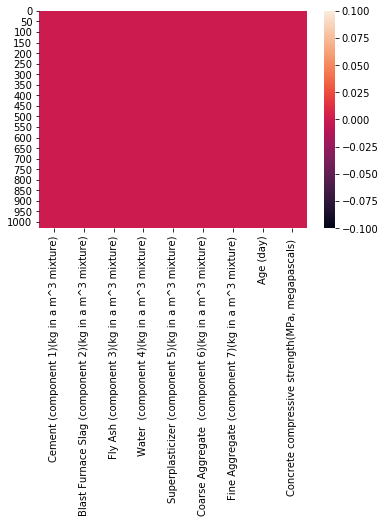

In [256]:
sns.heatmap(df.isnull())

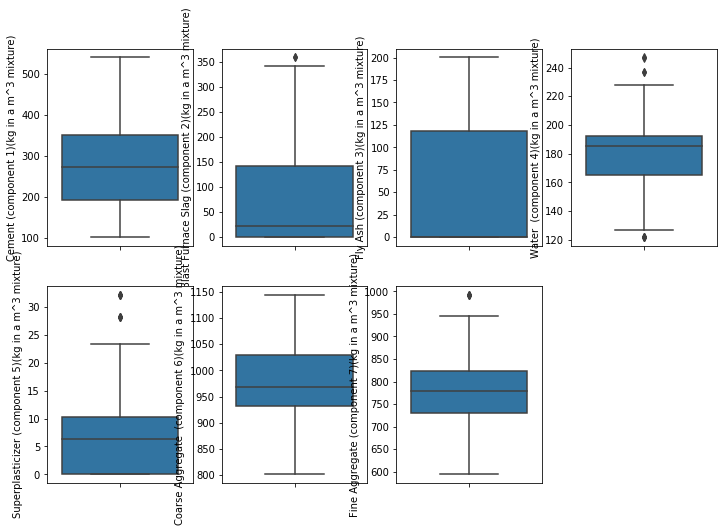

In [257]:
analyse = df.columns[:7]
current_palette = sns.color_palette("Blues")

fig, axes = plt.subplots(round(len(analyse)/4), 4, figsize = (12, 8))

for i, ax in enumerate(fig.axes):
    if i < len(analyse):
        sns.boxplot(x=analyse[i], data = df, ax = ax, orient = 'v')
fig.delaxes(ax = axes[1,3])

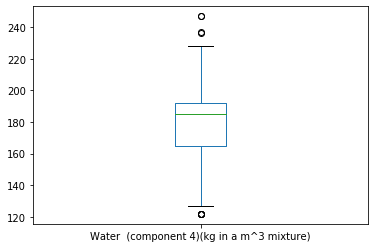

In [258]:
df['Water  (component 4)(kg in a m^3 mixture)'].plot.box()

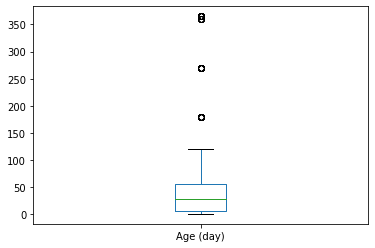

In [259]:
df['Age (day)'].plot.box()

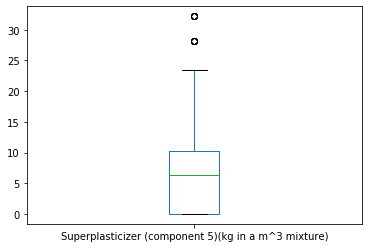

In [260]:
df['Superplasticizer (component 5)(kg in a m^3 mixture)'].plot.box()

Cement (component 1)(kg in a m^3 mixture)                   AxesSubplot(0.125,0.536818;0.133621x0.343182)
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Fly Ash (component 3)(kg in a m^3 mixture)                AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Water  (component 4)(kg in a m^3 mixture)                AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Superplasticizer (component 5)(kg in a m^3 mixture)      AxesSubplot(0.766379,0.536818;0.133621x0.343182)
Coarse Aggregate  (component 6)(kg in a m^3 mixture)           AxesSubplot(0.125,0.125;0.133621x0.343182)
Fine Aggregate (component 7)(kg in a m^3 mixture)           AxesSubplot(0.285345,0.125;0.133621x0.343182)
Age (day)                                                    AxesSubplot(0.44569,0.125;0.133621x0.343182)
Concrete compressive strength(MPa, megapascals)             AxesSubplot(0.606034,0.125;0.133621x0.343182)
dtype: object

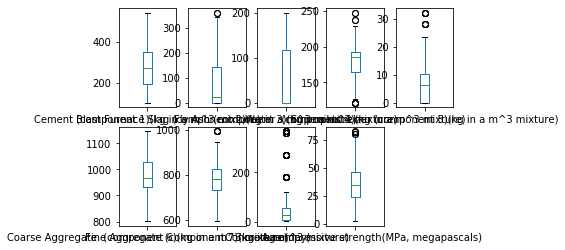

In [261]:
df.plot(kind='box',subplots=True, layout=(2,5))

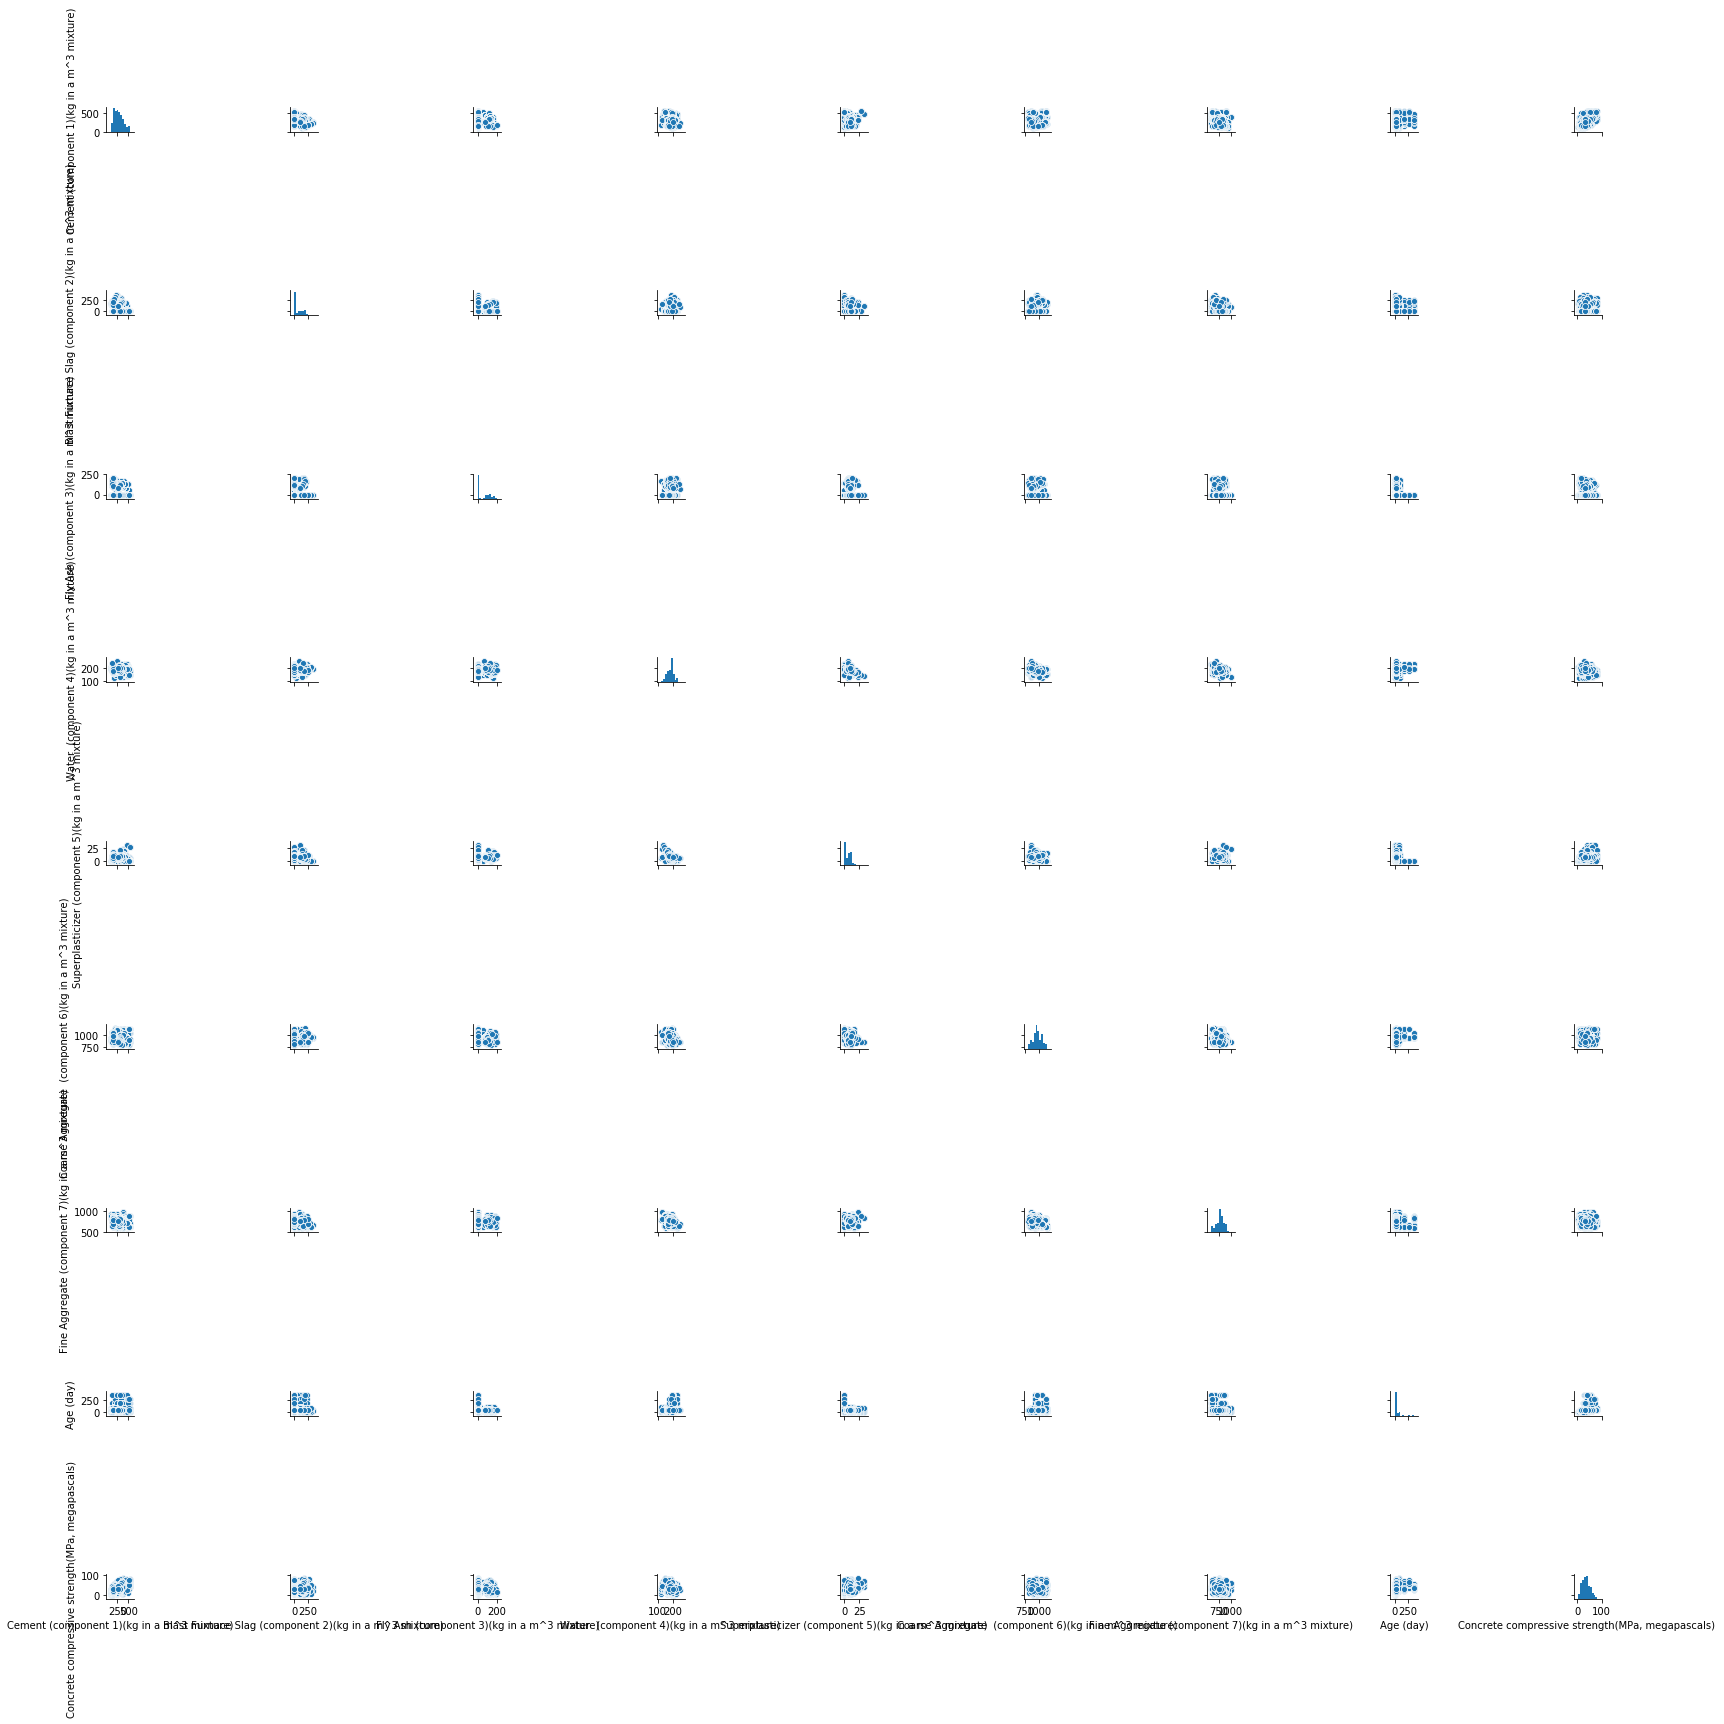

In [262]:
sns.pairplot(df)

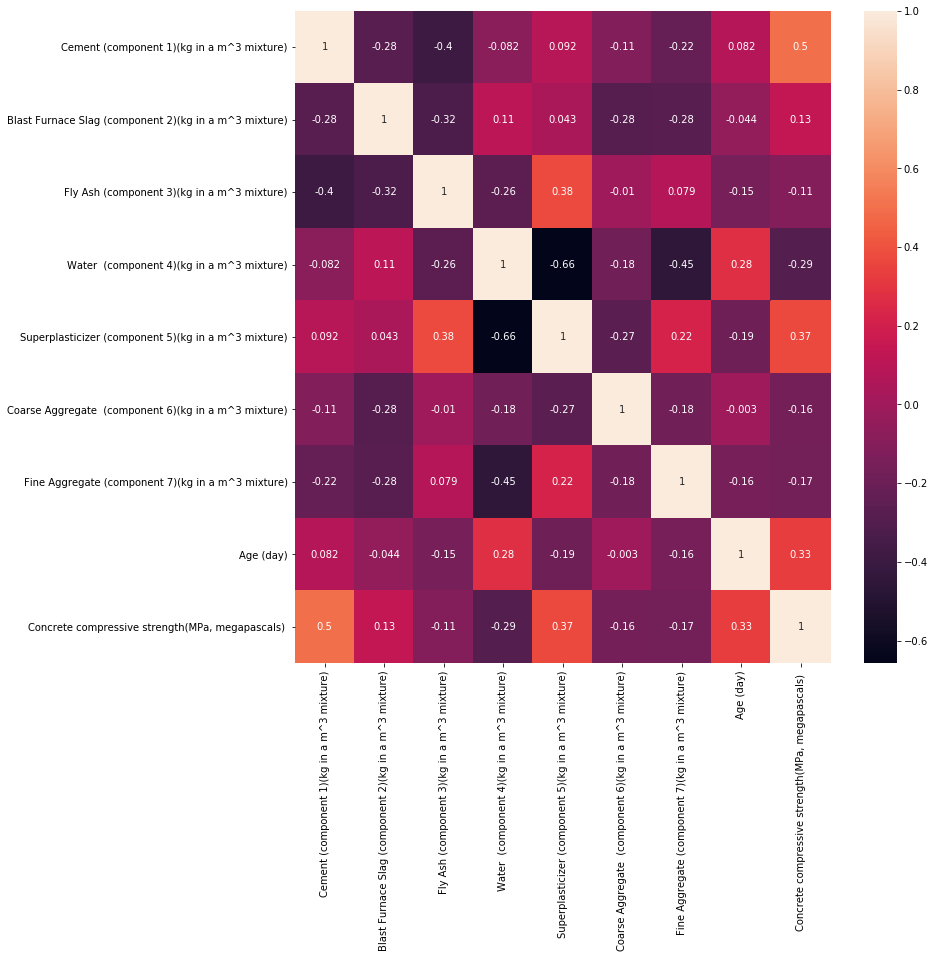

In [263]:
corr_hmap=df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [264]:
df[2:5]

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [265]:
df[10:12]

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
10,198.6,132.4,0.0,192.0,0.0,978.4,825.5,90,38.07
11,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,28.02


In [266]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [267]:
df.skew()

Cement (component 1)(kg in a m^3 mixture)                0.509481
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0.800717
Fly Ash (component 3)(kg in a m^3 mixture)               0.537354
Water  (component 4)(kg in a m^3 mixture)                0.074628
Superplasticizer (component 5)(kg in a m^3 mixture)      0.907203
Coarse Aggregate  (component 6)(kg in a m^3 mixture)    -0.040220
Fine Aggregate (component 7)(kg in a m^3 mixture)       -0.253010
Age (day)                                                3.269177
Concrete compressive strength(MPa, megapascals)          0.416977
dtype: float64

In [268]:
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [269]:
df.skew()

Cement (component 1)(kg in a m^3 mixture)                0.509481
Blast Furnace Slag (component 2)(kg in a m^3 mixture)   -0.032700
Fly Ash (component 3)(kg in a m^3 mixture)               0.537354
Water  (component 4)(kg in a m^3 mixture)                0.074628
Superplasticizer (component 5)(kg in a m^3 mixture)     -0.324821
Coarse Aggregate  (component 6)(kg in a m^3 mixture)    -0.040220
Fine Aggregate (component 7)(kg in a m^3 mixture)       -0.253010
Age (day)                                               -0.005085
Concrete compressive strength(MPa, megapascals)          0.416977
dtype: float64

In [270]:
from scipy.stats import zscore

In [271]:
z_score=abs(zscore(df))
print(df.shape)


(1030, 9)


In [272]:
df_final=df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(1028, 9)


In [273]:
x=df_final.iloc[:,:-1].values
x

array([[ 540.        ,    0.        ,    0.        , ..., 1040.        ,
         676.        ,    3.36729583],
       [ 540.        ,    0.        ,    0.        , ..., 1055.        ,
         676.        ,    3.36729583],
       [ 332.5       ,    4.96633504,    0.        , ...,  932.        ,
         594.        ,    5.60211882],
       ...,
       [ 148.5       ,    4.94449549,  108.6       , ...,  892.4       ,
         780.        ,    3.36729583],
       [ 159.1       ,    5.23484494,    0.        , ...,  989.6       ,
         788.9       ,    3.36729583],
       [ 260.9       ,    4.6200588 ,   78.3       , ...,  864.5       ,
         761.5       ,    3.36729583]])

In [274]:
y=df_final.iloc[:,-1].values
y

array([79.99, 61.89, 40.27, ..., 23.7 , 32.77, 32.4 ])

In [275]:
x.shape

(1028, 8)

In [276]:
y.shape

(1028,)

In [277]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=43)

In [278]:
x_train.shape

(822, 8)

In [279]:
y_train.shape

(822,)

In [280]:
lr=LinearRegression()

In [281]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [282]:
lr.coef_

array([ 8.56476824e-02,  2.08020794e+00,  4.70485075e-04, -1.97339261e-01,
        2.82057771e+00,  5.75223562e-03, -1.08776353e-02,  8.98087381e+00])

In [283]:
lr.intercept_

11.71400413788972

In [284]:
df_final.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [285]:
lr.score(x_train,y_train)

0.811564124150127

In [286]:
pred=lr.predict(x_test)
print("predicted x_test=== ",pred)
print("actual y_test results ==== ",y_test)

predicted x_test===  [17.62066705 44.17802185 17.81495391 61.29106649 29.76509701 46.05295879
 27.02776293 35.75928568 38.43933035 25.66720753 35.92673677 16.80948511
 19.511717   52.92424636 32.21089058 34.5103842  46.38328767 67.18409539
 26.94469764 47.05453371 27.7822327  28.30050388 28.78297396 65.9511671
 58.37038272 20.20001636 31.21238276 56.98998562 24.97381682 60.46310792
 37.23326438 41.52733766 67.74240386 48.31623593 57.56389312 33.54846985
 53.95938248 57.07610165 45.00340624 34.59074667 56.32362001 60.04771951
 10.93339922 43.58691173 37.85129989 41.50172104 39.93730649 36.26746934
 42.2565953  37.90720217 37.52504    25.99733908 49.6458864  27.40973165
 39.75083807 49.6676946  20.96733771 38.85212637 41.67448471 70.49625639
 13.10329441 26.13621218 37.97877384 57.25951484 24.89338345 21.60958572
 25.10060637 31.01545894 52.30150841 53.57511375 44.17802185 65.79103521
 54.3899743  40.86979889 31.38932702 27.84688983 33.96184147 56.35411304
 29.92737586 58.71700493 18.086

In [287]:
df=pd.DataFrame(pred)
df.to_csv('Concrete_Prediction Project')

In [288]:
score=cross_val_score(lr,x,y,cv=10)
print('score : ',score)

print('Mean Score',score.mean())
print('Standard deviation',score.std())

cross_pred=cross_val_predict(lr,x,y,cv=10)
print('y Prediction values')
print(cross_pred)

score :  [0.33922579 0.74212963 0.67704182 0.60400778 0.67796654 0.73972659
 0.85707226 0.8549784  0.57865269 0.5427659 ]
Mean Score 0.6613567398049403
Standard deviation 0.14728981982707356
y Prediction values
[59.38731114 59.39204406 55.34903157 ... 30.55052453 36.73356202
 38.16145715]


In [289]:
ADA= AdaBoostRegressor()
ADA.fit(x_train,y_train)
print(ADA.score(x_train,y_train))
ADApred=ADA.predict(x_test)
print(ADApred)
ADA.score(x_test,y_test)

0.8150002736275349
[24.23683168 40.52707317 23.62595745 66.37861538 33.87980392 41.47672727
 30.67565217 41.18842105 41.47672727 24.84042017 40.04648649 24.84042017
 24.23724    47.23164038 31.28434783 32.83688073 41.33044444 64.1139645
 31.06528024 41.47672727 28.34064286 31.30019841 25.39818627 61.69162242
 59.44197279 18.67981928 40.11108179 60.45082988 29.16629139 59.44197279
 40.97016949 40.97016949 64.66440141 41.25842697 62.22125    29.673
 50.20306202 54.26146552 41.18842105 41.04846154 64.1139645  64.1139645
 14.40126316 35.14821168 44.75352657 42.99161074 41.18842105 32.7832967
 41.33044444 37.00606557 37.00606557 24.84042017 49.49239344 31.42994737
 45.95718919 37.00606557 27.82373272 32.01342857 43.77287625 65.22885714
 24.23724    25.26188235 38.81121951 52.34935484 30.1700641  25.39818627
 31.06528024 35.14821168 54.26146552 59.44197279 40.52707317 63.80212121
 41.18842105 43.21044186 35.14821168 31.30019841 32.01342857 64.1139645
 25.39818627 59.88775701 26.97559242 63.8

0.7634634690859992

In [290]:
GBR= GradientBoostingRegressor(n_estimators=1000,learning_rate=.1)
GBR.fit(x_train,y_train)
GBR.score(x_test,y_test)

0.8987184943342514

In [291]:
from sklearn.externals import joblib

In [292]:
joblib.dump(GBR,'Model_Concrete_Dataset.csv')

['Model_Concrete_Dataset.csv']

In [293]:
model=joblib.load('Model_Concrete_Dataset.csv')

In [294]:
GBR.predict(x_test)

array([18.64396456, 44.92896858, 17.80309461, 68.06753769, 23.91252755,
       50.98615771, 16.58108871, 35.14458529, 46.93850607, 22.6054251 ,
       44.1217282 , 20.21574006, 17.6889602 , 45.83882372, 29.80602828,
       23.626328  , 32.41714395, 63.82510382, 20.02094423, 47.5234503 ,
       30.14469104, 31.32718165, 13.01500556, 57.37264977, 58.75207015,
       17.9150074 , 32.786685  , 68.2434257 , 26.13791765, 51.85181877,
       39.78929213, 50.79188254, 62.12449248, 44.25526957, 69.52563576,
       34.71747351, 49.60178357, 46.4780272 , 50.57347158, 39.11266797,
       68.83920153, 66.77147709, 13.29593907, 28.23998636, 49.83146752,
       36.26928288, 48.27114357, 43.10836733, 36.61772222, 34.33979011,
       41.37313258, 18.8886953 , 58.77795121, 26.34470908, 50.98555111,
       36.79969115, 23.00985011, 35.22786636, 52.99915121, 65.62850669,
       13.62294426, 23.95577746, 41.49851798, 65.07962171, 21.05786931,
       13.58150991, 32.28690139, 26.43437954, 58.67604023, 55.27